In [77]:
library(fpp)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [24]:
df = read.csv(gzfile('../taxi/anomaly-detection-data/taxi_tripcount_per_hour_7yrs.csv.gz','rt'))
df$datetime = ISOdatetime(year = df$Year,month = df$Month,day = df$Day, hour = df$Hour,min = 0,sec = 0)
taxi <- xts(df$Count,order.by = df$datetime)
colnames(taxi) <- c('trip_count')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“seek on a gzfile connection returned an internal error”Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“seek on a gzfile connection returned an internal error”Warning message:
“closing unused connection 4 (../taxi/anomaly-detection-data/taxi_tripcount_per_hour_7yrs.csv.gz)”

In [39]:
adf.test(ts_0901, alternative = "stationary")

Warning message in adf.test(ts_0901, alternative = "stationary"):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  ts_0901
Dickey-Fuller = -10.043, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


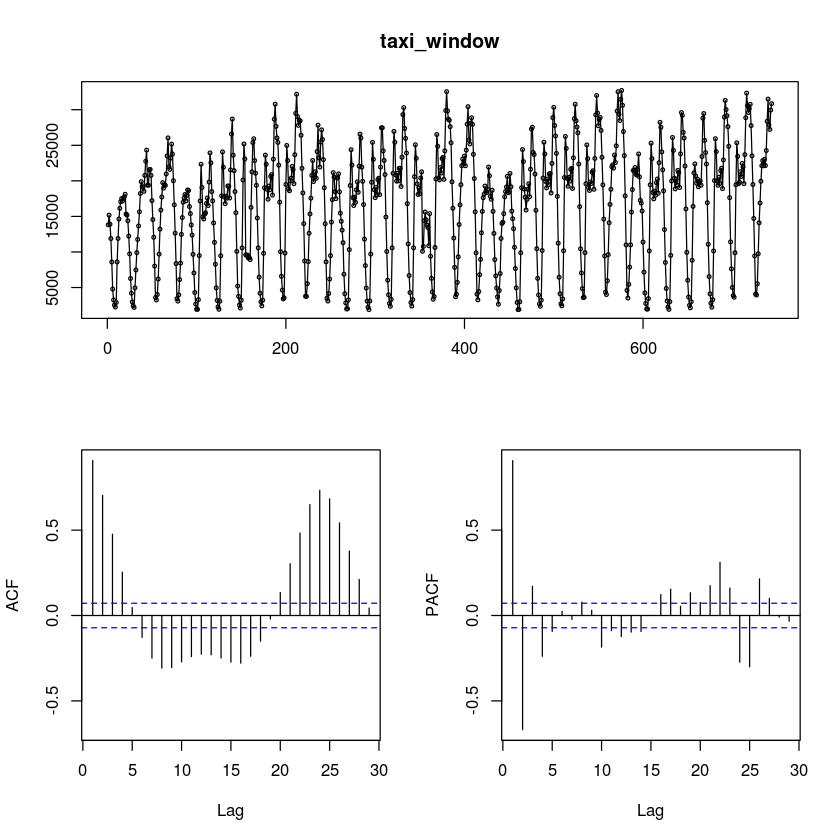

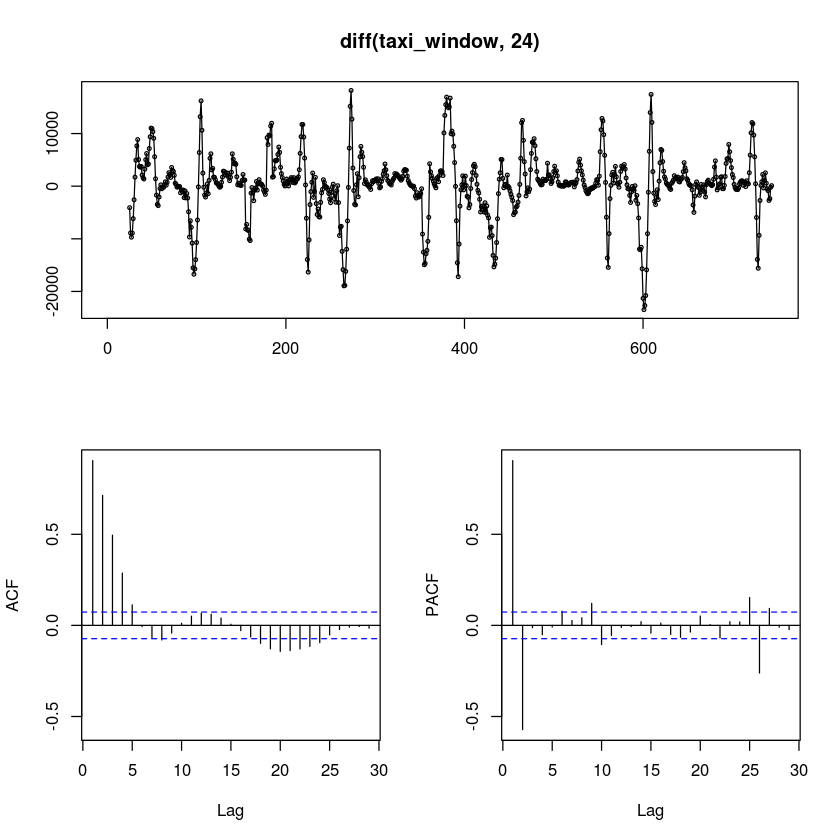

In [94]:
#taxi_window <- taxi[c('2009-01','2009-02')]
taxi_window <- taxi[c('2009-01')]
tsdisplay(taxi_window,)
tsdisplay(diff(taxi_window,24))

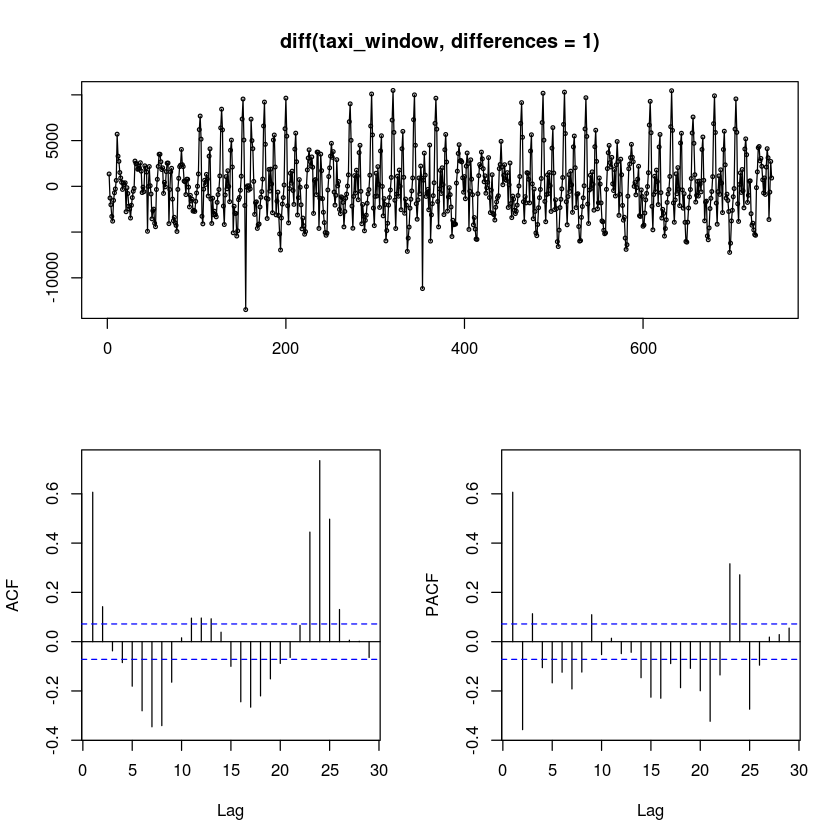

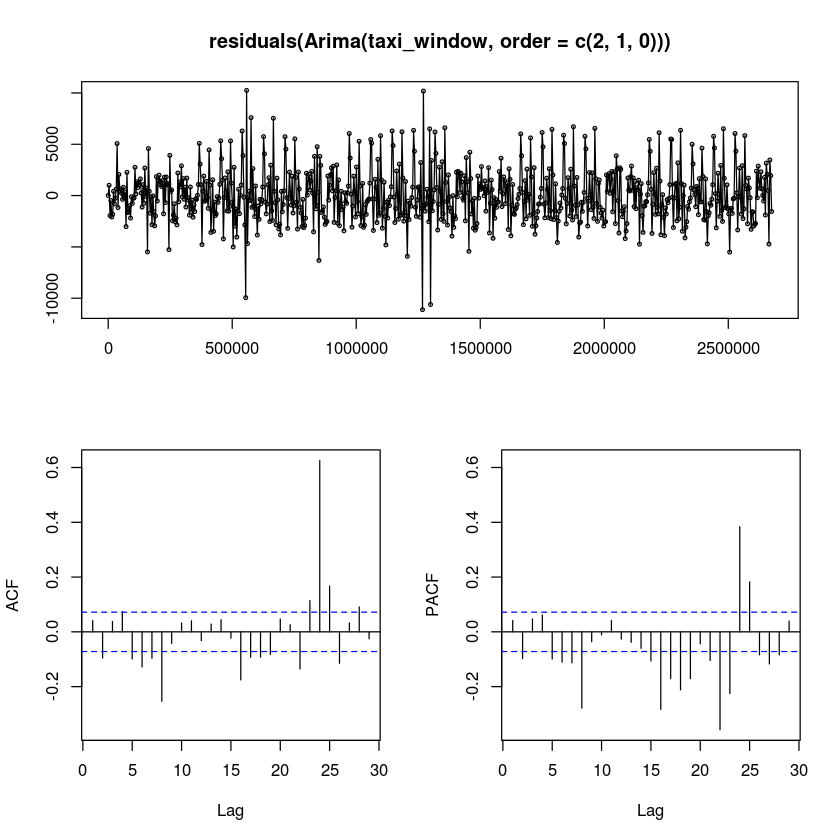

Series: taxi_window 
ARIMA(2,1,0)(0,1,1)[24]                    

Coefficients:
         ar1      ar2     sma1
      0.6921  -0.2150  -0.9223
s.e.  0.0366   0.0366   0.0313

sigma^2 estimated as 3333736:  log likelihood=-6441.24
AIC=12890.48   AICc=12890.53   BIC=12908.79

Training set error measures:
                   ME     RMSE      MAE    MPE     MAPE       MASE        ACF1
Training set 3.119021 1791.165 1300.471 1.5616 12.28542 0.07782398 -0.01878745


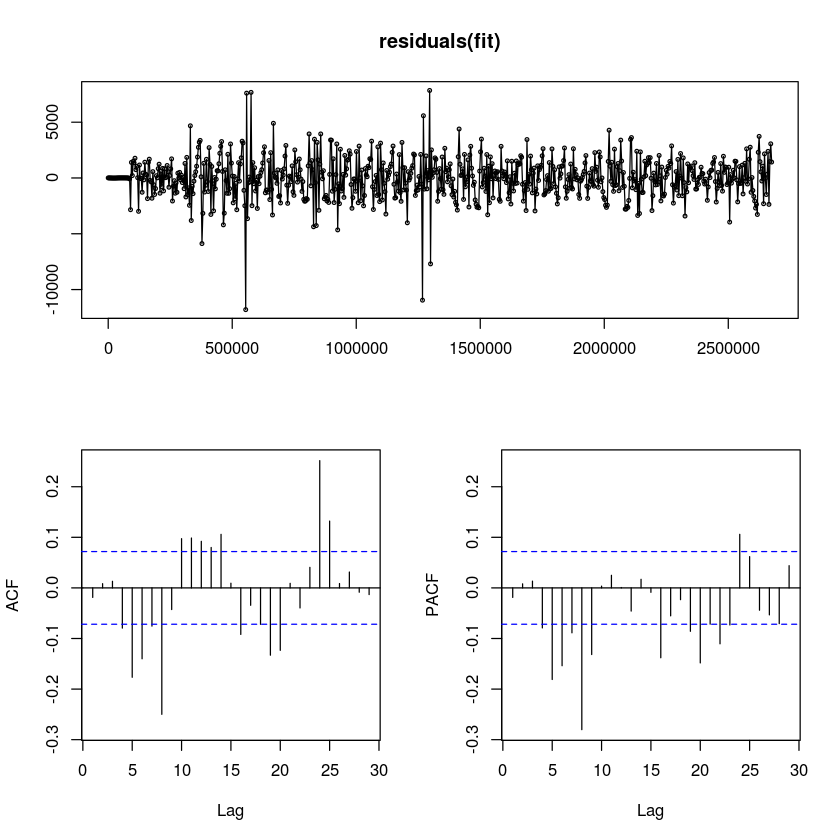

In [124]:
tsdisplay(diff(taxi_window,differences = 1))
tsdisplay(residuals(Arima(taxi_window,order = c(2,1,0))))

####
fit <- Arima(taxi_window,order = c(2,1,0),
                          seasonal = list(order=c(0,1,1),period=24))
tsdisplay(residuals(fit))
summary(fit)

#tsdisplay(diff(taxi_window,differences = 2))

In [130]:
Box.test(residuals(fit),lag=1)


	Box-Pierce test

data:  residuals(fit)
X-squared = 0.26261, df = 1, p-value = 0.6083


Series: taxi_window 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
       intercept
      16710.4140
s.e.    297.1137

sigma^2 estimated as 65766594:  log likelihood=-7751.79
AIC=15507.59   AICc=15507.6   BIC=15516.81
Series: taxi_window 
ARIMA(2,0,0)(1,1,0)[24]                    

Coefficients:
         ar1      ar2     sar1
      1.4611  -0.6132  -0.2682
s.e.  0.0299   0.0299   0.0369

sigma^2 estimated as 3636859:  log likelihood=-6460.75
AIC=12929.49   AICc=12929.55   BIC=12947.81

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 53.20334 1872.131 1264.531 -0.7993368 10.20332 0.0756732
                    ACF1
Training set 0.005338356
NULL
[1] "Auto ARIMA"
Series: taxi_window 
ARIMA(2,1,3)                    

Coefficients:
         ar1      ar2      ma1      ma2     ma3
      1.7089  -0.8116  -1.0696  -0.3263  0.4013
s.e.  0.0696   0.0535   0.1017   0.0475  0.0915

sigma^2 estimated as 5615180:  log likelihood=-6827

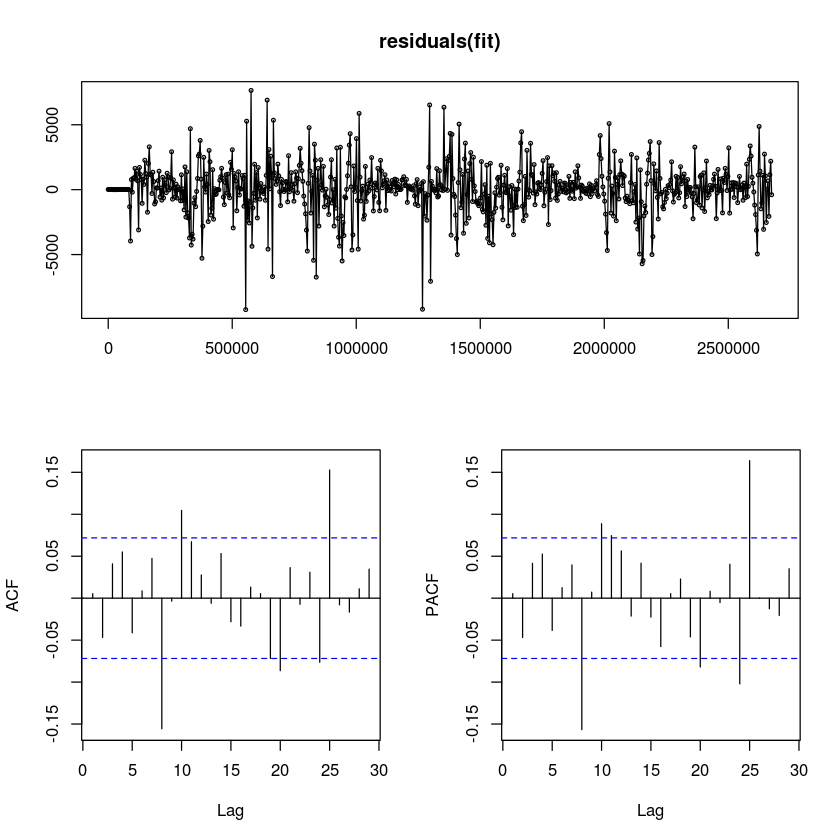

In [106]:
#Try arima(2,0,0)(1,1,0)[12]
print(Arima(taxi_window,order=c(0,0,0)))
fit <- Arima(taxi_window, order = c(2,0,0),seasonal = list(order=c(1,1,0),period=24))
summary(fit)
print(tsdisplay(residuals(fit)))

print('Auto ARIMA')
auto_fit <- auto.arima(taxi_window)
print(auto_fit)
print(tsdisplay(residuals(fit)))

In [108]:
summary(Arima(taxi_window, order = c(2,0,0),seasonal = list(order=c(1,1,0),period=24)))
summary(Arima(taxi_window, order = c(3,0,0),seasonal = list(order=c(1,1,0),period=24)))
summary(Arima(taxi_window, order = c(1,0,0),seasonal = list(order=c(1,1,0),period=24)))

summary(Arima(taxi_window, order = c(2,1,0),seasonal = list(order=c(1,1,0),period=24)))
summary(Arima(taxi_window, order = c(2,0,1),seasonal = list(order=c(1,1,0),period=24)))

summary(Arima(taxi_window, order = c(2,0,0),seasonal = list(order=c(0,1,0),period=24)))
summary(Arima(taxi_window, order = c(2,0,0),seasonal = list(order=c(2,1,0),period=24)))
summary(Arima(taxi_window, order = c(2,0,0),seasonal = list(order=c(1,1,1),period=24)))

Series: taxi_window 
ARIMA(2,0,0)(1,1,0)[24]                    

Coefficients:
         ar1      ar2     sar1
      1.4611  -0.6132  -0.2682
s.e.  0.0299   0.0299   0.0369

sigma^2 estimated as 3636859:  log likelihood=-6460.75
AIC=12929.49   AICc=12929.55   BIC=12947.81

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 53.20334 1872.131 1264.531 -0.7993368 10.20332 0.0756732
                    ACF1
Training set 0.005338356
Series: taxi_window 
ARIMA(3,0,0)(1,1,0)[24]                    

Coefficients:
        ar1      ar2     ar3     sar1
      1.468  -0.6295  0.0110  -0.2693
s.e.  0.038   0.0630  0.0375   0.0371

sigma^2 estimated as 3641418:  log likelihood=-6460.7
AIC=12931.41   AICc=12931.49   BIC=12954.3

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE       MASE
Training set 52.63807 1871.998 1264.517 -0.8052885 10.22813 0.07567241
                      ACF1
Training set -0.